<a href="https://colab.research.google.com/github/AIWalaBro/Feature_Eng/blob/main/5.2)%20Outlier%20Handling%20(via%20IQR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
34,8.15,9.0,0
717,6.49,21.0,0
615,6.51,12.0,0
977,7.18,49.0,0
974,6.42,38.0,0


In [4]:
# lets describe the data 
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


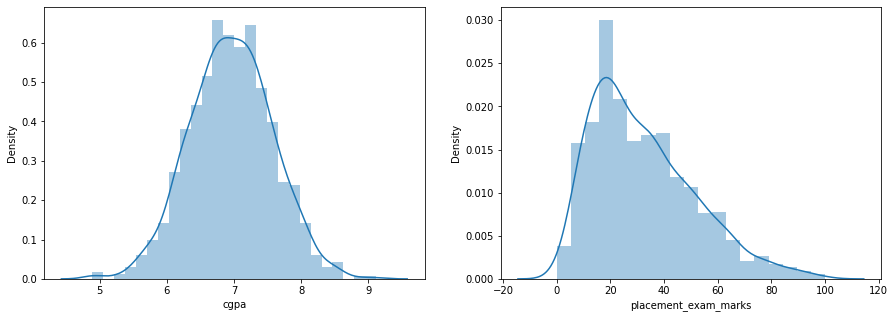

In [5]:
# lets see the distribution plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

# Observation:- we noticed that placement_exam_marks has been right skwed so lets handeled this column by Trimming and Capping Method

In [6]:
print(df['placement_exam_marks'].skew())# this not normally distributed
print(df['cgpa'].skew()) # this is normally distributed 

0.8356419499466834
-0.014529938929314918


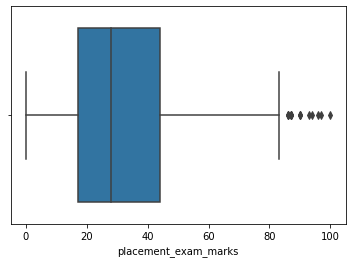

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
# Finding the IQR
percentile_25 = df['placement_exam_marks'].quantile(0.25)
print(percentile_25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)
print(percentile_75)

17.0
44.0


In [9]:
# lets calculate the IQR
IQR = percentile_75 - percentile_25
print(IQR)

27.0


In [10]:
# lets defined the upper limit and lower limit
upper_limit = percentile_75 + 1.5*IQR
lower_limit = percentile_25 - 1.5*IQR

In [11]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


# LETS Finding out the Outliers

In [12]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [13]:
df[df['placement_exam_marks'] < lower_limit]
# lower limit has been 0 of the of placement columns so no need to worry about

,cgpa,placement_exam_marks,placed


# 1) Trimming

In [14]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# comparing the previos and latest change

'''You have three numbers that are used within subplot. subplot places multiple figures within the same window. You can place plots within a m x n grid, where m contains the number of rows and n contains the number of columns in your figure. p determines where you want to place your plot within the grid. The number p increases from 1 up to m x n, and the plots are placed from left to right, and top to bottom.

In this case, when you do subplot(1,2,1); or subplot(121);, you would like to have one row and two columns worth of figures. The last number, p=1 means that you wish to place the plot in the left most column. When you do subplot(1,2,2); or subplot(122);, this is when p=2 and you wish to place the plot in the right most column.'''

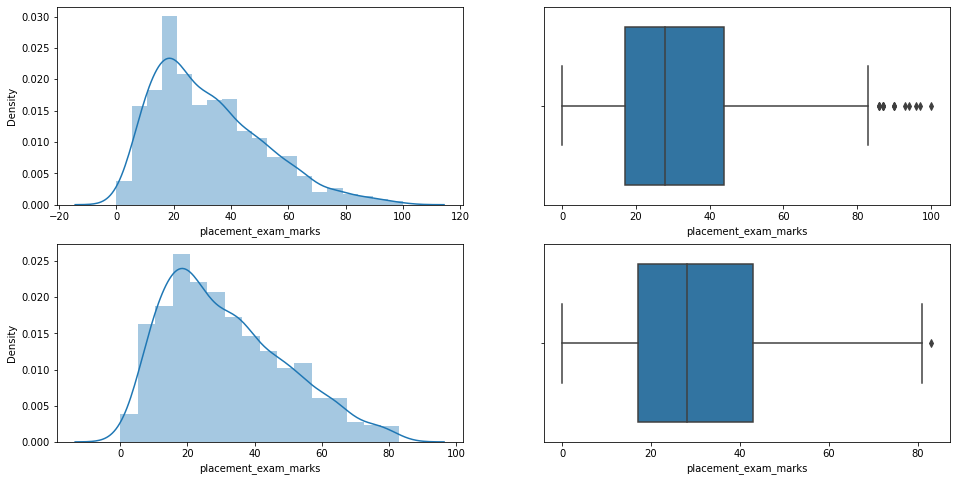

In [15]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


# Capping

#### how does numpy where function works
np.where(1>condition,2>if true execute first statement(true statement) ,3>if false then execute the another statement))

In [16]:
new_cap_df = df.copy()

In [17]:

new_cap_df['placement_exam_marks'] = np.where(new_cap_df['placement_exam_marks'] > upper_limit,upper_limit,
                                     np.where(new_cap_df['placement_exam_marks'] < lower_limit,lower_limit,
                                     new_cap_df['placement_exam_marks']))

In [18]:
new_cap_df.shape

(1000, 3)

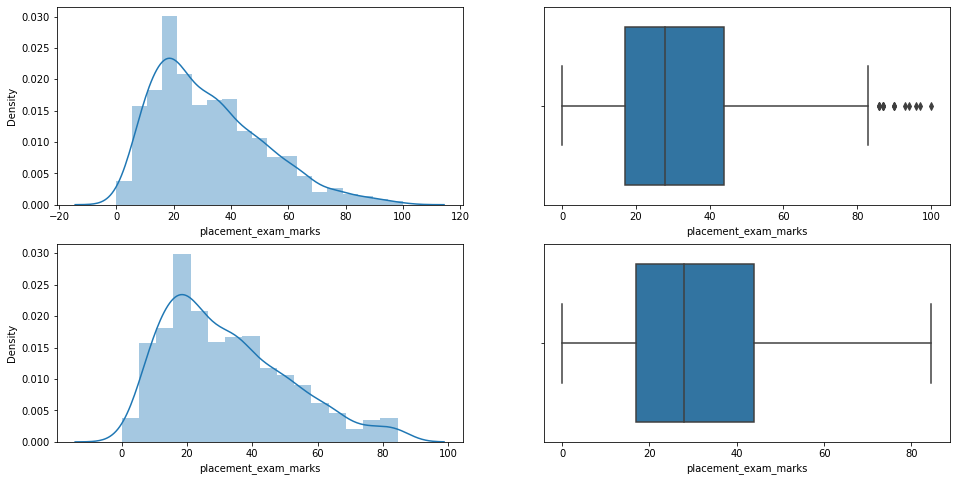

In [19]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_cap_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_cap_df['placement_exam_marks'])

plt.show()

# Observation:- see the distribution plot near 80 values the bar graph has bben incresed as compare to previos one and in box plot the otliers are removed totally by capping techniques

In [20]:
# test